In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import csv

# Directories containing transcripted files
truthful_dir = "/content/sample_data/Truthful"
deceptive_dir = "/content/sample_data/Deceptive"

# Define the header for the CSV dataset
header = ['File Name', 'Speaker ID', 'Transcript', 'Label']

# Initialize an empty list to store data
data = []

# Initialize a dictionary to map speaker IDs to numbers
speaker_id_map = {}

# Function to map speaker IDs to numbers
def map_speaker_id(speaker_id, next_speaker_id):
    if speaker_id not in speaker_id_map:
        speaker_id_map[speaker_id] = next_speaker_id
        next_speaker_id += 1
    return speaker_id_map[speaker_id], next_speaker_id

# Function to read transcripts from a directory and assign labels
def read_transcripts(directory, label, next_speaker_id):
    transcripts = []
    for filename in os.listdir(directory):
        speaker_id = filename.split('_')[0]
        speaker_id_number, next_speaker_id = map_speaker_id(speaker_id, next_speaker_id)
        with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
            transcript_text = file.read()
        transcripts.append([filename, speaker_id_number, transcript_text, label])
    return transcripts, next_speaker_id

# Read truthful and deceptive transcripts
truthful_transcripts, next_speaker_id = read_transcripts(truthful_dir, 'truthful', 1)
deceptive_transcripts, next_speaker_id = read_transcripts(deceptive_dir, 'deceptive', next_speaker_id)

# Combine transcripts from both categories
data = truthful_transcripts + deceptive_transcripts

# Write data to CSV file
with open('dataset.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)  # Write header
    writer.writerows(data)   # Write data rows

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/Truthful'

In [4]:
import nltk

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import pandas as pd

In [7]:
df= pd.read_csv('/content/drive/MyDrive/exp_dataset.csv')
df.head(5)

,File Name,Transcript,Label
0,Rec141_memo_memo.txt,I had recently visited Paris every moment feel...,truthful
1,New Recording 8.m4a.cc8e8ff8-815d-4b29-91b1-2d...,Stepping fruit in the U S O for the first time...,truthful
2,New Recording 12.m4a.09188977-2455-4d9d-9dc6-0...,My first trip to the U S A was incredible land...,truthful
3,New Recording 19.m4a.88b4c76e-04e1-435c-afc3-1...,Visiting the USA for the first time was like e...,truthful
4,New Recording 4.m4a.0fc0b022-cd88-47f0-ad59-13...,Stepping off the plane in the USA for the firs...,truthful


In [8]:
df.isna().sum()

File Name     0
Transcript    2
Label         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(1026, 3)

In [11]:
print(f"Number of True statements: {df[df['Label'] == 'truthful'].shape[0]}")
print(f"Number of False statements: {df[df['Label'] == 'deceptive'].shape[0]}")

Number of True statements: 493
Number of False statements: 533


In [12]:
df.shape

(1026, 3)

In [13]:
pip install spacy

In [14]:
import spacy
from collections import Counter

In [15]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
# Load Spacy's English language model
nlp = spacy.load("en_core_web_lg")

In [17]:
# Define a function to tokenize text
def tokenize(txt):
    # Remove punctuation and double space, and convert to lowercase:
    tokens = [token.text.lower() for token in txt if not (token.is_punct or token.is_space)]
    # Join tokens back into a string
    tokens = " ".join(tokens)
    return tokens

# Apply the preprocessing pipeline using nlp.pipe
tokenized_txt = []

for txt in nlp.pipe(df['Transcript']):
    tokenized_txt.append(tokenize(txt))

# Add the preprocessed text as a new column in the dataframe
df['tokenized_Transcript'] = tokenized_txt

In [18]:
df

,File Name,Transcript,Label,tokenized_Transcript
0,Rec141_memo_memo.txt,I had recently visited Paris every moment feel...,truthful,i had recently visited paris every moment feel...
1,New Recording 8.m4a.cc8e8ff8-815d-4b29-91b1-2d...,Stepping fruit in the U S O for the first time...,truthful,stepping fruit in the u s o for the first time...
2,New Recording 12.m4a.09188977-2455-4d9d-9dc6-0...,My first trip to the U S A was incredible land...,truthful,my first trip to the u s a was incredible land...
3,New Recording 19.m4a.88b4c76e-04e1-435c-afc3-1...,Visiting the USA for the first time was like e...,truthful,visiting the usa for the first time was like e...
4,New Recording 4.m4a.0fc0b022-cd88-47f0-ad59-13...,Stepping off the plane in the USA for the firs...,truthful,stepping off the plane in the usa for the firs...
...,...,...,...,...
1023,false 195.txt,My first travel experience is to visit the Dar...,deceptive,my first travel experience is to visit the dar...
1024,false 197.txt,My first travel experience is to visit muchu p...,deceptive,my first travel experience is to visit muchu p...
1025,false 198.txt,My first travel experience is to visit Hallsta...,deceptive,my first travel experience is to visit hallsta...
1026,false 199.txt,My first trip is to visit Jiuzhaigou valley in...,deceptive,my first trip is to visit jiuzhaigou valley in...


In [19]:
# Define a function to lemmatize content words
def preprocessed_text(txt):
    # Lemmatize content words, remove punctuation, double space, and stop words:
    clean_tokens = [token.lemma_ for token in txt if not (token.is_punct or token.is_space or token.is_stop)]
    # Join the cleaned tokens back into a string
    clean_text = " ".join(clean_tokens)
    return clean_text.lower()

# Apply the preprocessing pipeline using nlp.pipe
clean_text = []

for txt in nlp.pipe(df['Transcript']):
    clean_text.append(preprocessed_text(txt))

# Add the preprocessed text as a new column in the dataframe
df['clean_text'] = clean_text

In [20]:
df

,File Name,Transcript,Label,tokenized_Transcript,clean_text
0,Rec141_memo_memo.txt,I had recently visited Paris every moment feel...,truthful,i had recently visited paris every moment feel...,recently visit paris moment feel like scene ro...
1,New Recording 8.m4a.cc8e8ff8-815d-4b29-91b1-2d...,Stepping fruit in the U S O for the first time...,truthful,stepping fruit in the u s o for the first time...,step fruit u s o time accelerate travel san fr...
2,New Recording 12.m4a.09188977-2455-4d9d-9dc6-0...,My first trip to the U S A was incredible land...,truthful,my first trip to the u s a was incredible land...,trip u s incredible landing new york city feel...
3,New Recording 19.m4a.88b4c76e-04e1-435c-afc3-1...,Visiting the USA for the first time was like e...,truthful,visiting the usa for the first time was like e...,visit usa time like enter new world mention me...
4,New Recording 4.m4a.0fc0b022-cd88-47f0-ad59-13...,Stepping off the plane in the USA for the firs...,truthful,stepping off the plane in the usa for the firs...,step plane usa time fill anticipation visit wa...
...,...,...,...,...,...
1023,false 195.txt,My first travel experience is to visit the Dar...,deceptive,my first travel experience is to visit the dar...,travel experience visit dark hedge northern ir...
1024,false 197.txt,My first travel experience is to visit muchu p...,deceptive,my first travel experience is to visit muchu p...,travel experience visit muchu picchu peru actu...
1025,false 198.txt,My first travel experience is to visit Hallsta...,deceptive,my first travel experience is to visit hallsta...,travel experience visit hallstatt austria actu...
1026,false 199.txt,My first trip is to visit Jiuzhaigou valley in...,deceptive,my first trip is to visit jiuzhaigou valley in...,trip visit jiuzhaigou valley china actually na...


In [21]:
# Number of words in each transcript text
wordcount = [len(text.split()) for text in df['tokenized_Transcript']]
df['wordcount'] = wordcount
df

,File Name,Transcript,Label,tokenized_Transcript,clean_text,wordcount
0,Rec141_memo_memo.txt,I had recently visited Paris every moment feel...,truthful,i had recently visited paris every moment feel...,recently visit paris moment feel like scene ro...,54
1,New Recording 8.m4a.cc8e8ff8-815d-4b29-91b1-2d...,Stepping fruit in the U S O for the first time...,truthful,stepping fruit in the u s o for the first time...,step fruit u s o time accelerate travel san fr...,57
2,New Recording 12.m4a.09188977-2455-4d9d-9dc6-0...,My first trip to the U S A was incredible land...,truthful,my first trip to the u s a was incredible land...,trip u s incredible landing new york city feel...,62
3,New Recording 19.m4a.88b4c76e-04e1-435c-afc3-1...,Visiting the USA for the first time was like e...,truthful,visiting the usa for the first time was like e...,visit usa time like enter new world mention me...,61
4,New Recording 4.m4a.0fc0b022-cd88-47f0-ad59-13...,Stepping off the plane in the USA for the firs...,truthful,stepping off the plane in the usa for the firs...,step plane usa time fill anticipation visit wa...,59
...,...,...,...,...,...,...
1023,false 195.txt,My first travel experience is to visit the Dar...,deceptive,my first travel experience is to visit the dar...,travel experience visit dark hedge northern ir...,51
1024,false 197.txt,My first travel experience is to visit muchu p...,deceptive,my first travel experience is to visit muchu p...,travel experience visit muchu picchu peru actu...,52
1025,false 198.txt,My first travel experience is to visit Hallsta...,deceptive,my first travel experience is to visit hallsta...,travel experience visit hallstatt austria actu...,47
1026,false 199.txt,My first trip is to visit Jiuzhaigou valley in...,deceptive,my first trip is to visit jiuzhaigou valley in...,trip visit jiuzhaigou valley china actually na...,54


In [22]:
# Here we are dealing with statistical analysis based on number of words in a transcript text.
def analyze_word_counts(words):
    wordcount_minimum = min(words)
    wordcount_maximum  = max(words)
    wordcount_average = sum(words) / len(words)
    variance = sum((count - wordcount_average) ** 2 for count in words) / len(words)
    wordcount_std_dev = variance ** 0.5

    print(f"Minimum number of words: {wordcount_minimum}")
    print(f"Maximum number of words: {wordcount_maximum}")
    print(f"Average number of words: {wordcount_average}")
    print(f"Standard deviation number of words: {wordcount_std_dev}")

    return wordcount_minimum, wordcount_maximum, wordcount_average, wordcount_std_dev
print('Analysis of word count:')
wordcount_stats = analyze_word_counts(df['wordcount'])

Analysis of word count:
Minimum number of words: 3
Maximum number of words: 150
Average number of words: 59.141325536062375
Standard deviation number of words: 19.696540592281252


In [23]:
#Now we will be getting the word count analysis for truthful and deceptive statements seperatly by spliting
truthful_data = df[df['Label'] == 'truthful']
print(truthful_data)
deceptive_data = df[df['Label'] == 'deceptive']
print(deceptive_data)
print()
print('Truthful statements:')
wordcount_stats_truth = analyze_word_counts(truthful_data['wordcount'])
print()
print('Deceptive statements:')
wordcount_stats_deceptive = analyze_word_counts(deceptive_data['wordcount'])

                                             File Name  \
0                                 Rec141_memo_memo.txt   
1    New Recording 8.m4a.cc8e8ff8-815d-4b29-91b1-2d...   
2    New Recording 12.m4a.09188977-2455-4d9d-9dc6-0...   
3    New Recording 19.m4a.88b4c76e-04e1-435c-afc3-1...   
4    New Recording 4.m4a.0fc0b022-cd88-47f0-ad59-13...   
..                                                 ...   
489                                      voice 100.txt   
490                                      Voice 088.txt   
491                                      Voice 093.txt   
492                                      Voice 099.txt   
493                                      Voice 091.txt   

                                            Transcript     Label  \
0    I had recently visited Paris every moment feel...  truthful   
1    Stepping fruit in the U S O for the first time...  truthful   
2    My first trip to the U S A was incredible land...  truthful   
3    Visiting the USA for the f

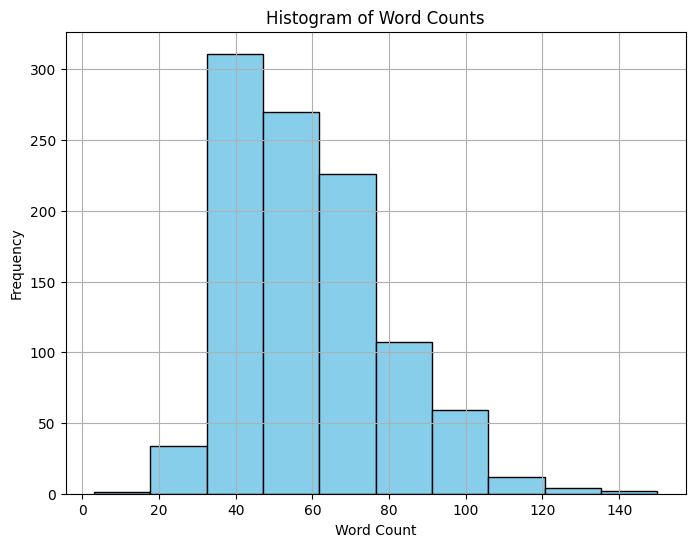

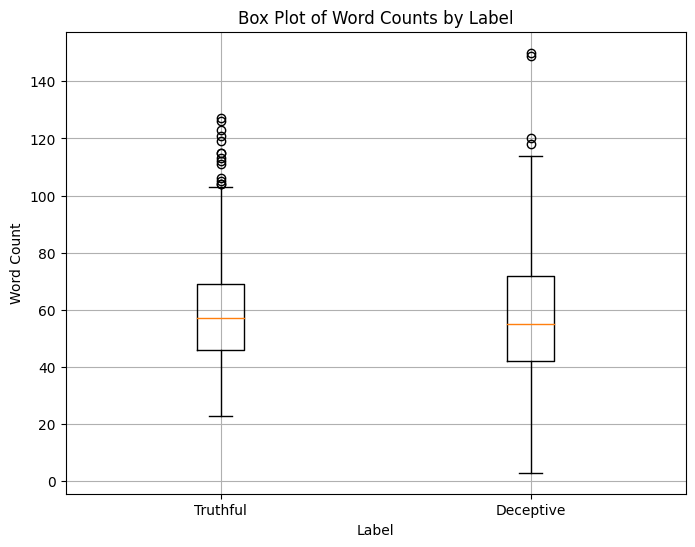

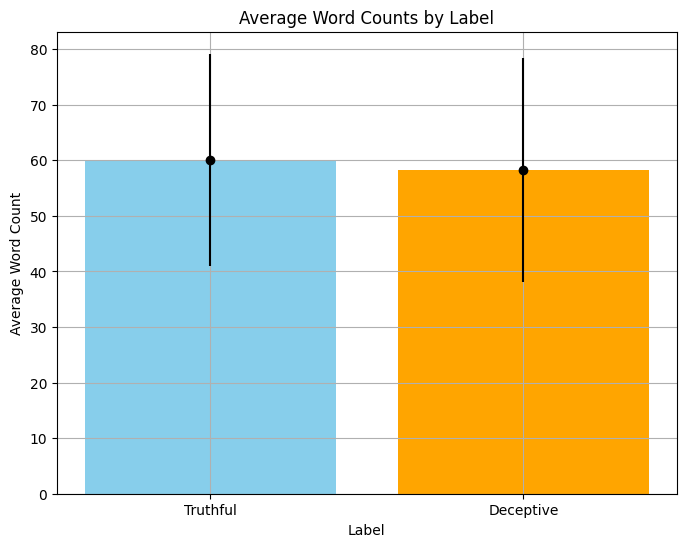

In [24]:
import matplotlib.pyplot as plt

# Histogram of Word Counts
plt.figure(figsize=(8, 6))
plt.hist(df['wordcount'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box Plot of Word Counts by Label
plt.figure(figsize=(8, 6))
plt.boxplot([truthful_data['wordcount'], deceptive_data['wordcount']], labels=['Truthful', 'Deceptive'])
plt.title('Box Plot of Word Counts by Label')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()

# Bar Plot of Average Word Counts by Label
plt.figure(figsize=(8, 6))
plt.bar(['Truthful', 'Deceptive'], [truthful_data['wordcount'].mean(), deceptive_data['wordcount'].mean()], color=['skyblue', 'orange'])
plt.errorbar(['Truthful', 'Deceptive'], [truthful_data['wordcount'].mean(), deceptive_data['wordcount'].mean()],
             yerr=[truthful_data['wordcount'].std(), deceptive_data['wordcount'].std()], fmt='o', color='black')
plt.title('Average Word Counts by Label')
plt.xlabel('Label')
plt.ylabel('Average Word Count')
plt.grid(True)
plt.show()

In [25]:
df.to_csv('Experience_data_preprocessed.csv', index = False)

In [26]:
!pip install textstat

TEXT STATISTICS

In [27]:
import textstat

In [28]:
df_textstat = pd.DataFrame()

for trail in df['Transcript']:
  # number of sentences
  sentence_count = textstat.sentence_count(trail)

  # number of words
  words_count = textstat.lexicon_count(trail)

  # number of syllables
  syllable_count = textstat.syllable_count(trail)

  # average number of syllables per word
  avg_number_of_syllablesperword = syllable_count / words_count

  # Flesch-Kincaid Grade Level (focus on sentence length)
  fleschk_gradelevel_sent = textstat.flesch_kincaid_grade(trail)

  # Compute the Flesch-Kincaid Grade Level (focus on syllables length)
  fleschk_gradelevel_syl = textstat.flesch_reading_ease(trail)

  text_stat_results = {
      'sentence_count': sentence_count,
      #'num_words': num_words,
      'syllable_count': syllable_count,
      'avg_number_of_syllablesperword': avg_number_of_syllablesperword,
      'fleschk_gradelevel_sent': fleschk_gradelevel_sent,
      'fleschk_gradelevel_syl': fleschk_gradelevel_syl
  }

  # Append the dictionary to text_stats_df as a new row
  df_textstat = pd.concat([df_textstat, pd.DataFrame(text_stat_results, index=[0])], ignore_index=True)


# Display the final dataset:
#text_stats_df['outcome_class'] = list(df['outcome_class'])
df_textstat

,sentence_count,syllable_count,avg_number_of_syllablesperword,fleschk_gradelevel_sent,fleschk_gradelevel_syl
0,1,74,1.423077,21.2,35.62
1,3,81,1.446429,8.2,69.41
2,4,86,1.409836,6.9,72.87
3,4,83,1.431034,6.6,73.68
4,3,83,1.406780,8.6,68.40
...,...,...,...,...,...
1021,3,64,1.280000,6.3,79.90
1022,5,69,1.408163,4.8,78.45
1023,4,71,1.543478,6.6,68.26
1024,4,74,1.450980,7.1,66.94


JACCARD INDEX

In [29]:
# Convert each column to sets of unique words
split1 = set(truthful_data['clean_text'].str.split().explode())
split2 = set(deceptive_data['clean_text'].str.split().explode())

# Compute the intersection and union of the two sets
intersec = split1.intersection(split2)
union = split1.union(split2)

# Compute the Jaccard index
jaccard_index = len(intersec) / len(union)

print(f"Jaccard index: {jaccard_index:.2f}")

Jaccard index: 0.35


NAME ENTITY

In [30]:
name_entity_df = pd.read_csv('/content/drive/MyDrive/ner_Experience_data.csv',encoding = "UTF-8")

In [31]:
name_entity_df

,FAC,PERSON,ORG,GPE,LOC,WORK_OF_ART,DATE,ORDINAL,TIME,CARDINAL,PRODUCT,NORP,EVENT,LANGUAGE,QUANTITY,MONEY,Label
0,3.174603,1.587302,1.587302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,truthful
1,0.000000,0.000000,0.000000,2.173913,1.086957,1.086957,1.086957,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,truthful
2,1.388889,0.000000,0.000000,1.388889,1.388889,0.000000,0.000000,1.388889,1.388889,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,truthful
3,0.000000,5.882353,0.000000,1.960784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,truthful
4,0.000000,4.761905,0.000000,4.761905,2.380952,0.000000,2.380952,2.380952,0.000000,2.380952,0.0,0.000000,0.0,0.0,0.0,0.0,truthful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,2.702703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.702703,0.0,0.0,0.0,0.0,deceptive
1022,0.000000,0.000000,0.000000,2.469136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,deceptive
1023,0.000000,0.000000,0.000000,1.923077,1.923077,0.000000,0.000000,1.923077,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,deceptive
1024,0.000000,0.000000,0.000000,7.317073,0.000000,0.000000,0.000000,4.878049,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,deceptive


In [32]:
print("Entity\t\tDESCRIPTION")
print("---------------------------")

for ent in list(name_entity_df.columns[:-2]):
  print(ent+"\t\t"+spacy.explain(ent))

Entity		DESCRIPTION
---------------------------
FAC		Buildings, airports, highways, bridges, etc.
PERSON		People, including fictional
ORG		Companies, agencies, institutions, etc.
GPE		Countries, cities, states
LOC		Non-GPE locations, mountain ranges, bodies of water
WORK_OF_ART		Titles of books, songs, etc.
DATE		Absolute or relative dates or periods
ORDINAL		"first", "second", etc.
TIME		Times smaller than a day
CARDINAL		Numerals that do not fall under another type
PRODUCT		Objects, vehicles, foods, etc. (not services)
NORP		Nationalities or religious or political groups
EVENT		Named hurricanes, battles, wars, sports events, etc.
LANGUAGE		Any named language
QUANTITY		Measurements, as of weight or distance


In [33]:
name_entity_df1 = pd.DataFrame([])

In [34]:
name_entity_df1['Temporal details'] = name_entity_df['DATE'] + name_entity_df['TIME']
name_entity_df1['Spatial details'] = name_entity_df['GPE'] + name_entity_df['LOC'] + name_entity_df['FAC']
name_entity_df1['People'] = name_entity_df['PERSON']
name_entity_df1['Quantity details'] = name_entity_df['QUANTITY'] + name_entity_df['CARDINAL'] + name_entity_df['ORDINAL']

In [35]:
name_entity_df1

,Temporal details,Spatial details,People,Quantity details
0,0.000000,3.174603,1.587302,0.000000
1,1.086957,3.260870,0.000000,0.000000
2,1.388889,4.166667,0.000000,1.388889
3,0.000000,1.960784,5.882353,0.000000
4,2.380952,7.142857,4.761905,4.761905
...,...,...,...,...
1021,0.000000,2.702703,0.000000,0.000000
1022,0.000000,2.469136,0.000000,0.000000
1023,0.000000,3.846154,0.000000,1.923077
1024,0.000000,7.317073,0.000000,4.878049


LIWC ANALYSIS

In [36]:
LIWC_ANALYSIS_results = pd.read_csv('/content/drive/MyDrive/LIWC DATASET RESULTS.csv',delimiter=',')
LIWC_ANALYSIS_results

,File Name,Speaker ID,Transcript,Label,Segment,WC,Analytic,Clout,Authentic,Tone,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,RRec39.m4a.3c01bb13-7c26-4048-9900-e2938890cf3...,1,Claiming the steps of Rockport Templin there's...,truthful,1,62,93.30,11.07,97.57,20.23,...,0.00,1.61,24.19,11.29,4.84,0.00,0.00,1.61,6.45,0
1,TRANSCRIPTS (17).txt,2,Was like stepping into a vibrant tapestry of s...,truthful,1,92,99.00,18.24,60.36,99.00,...,0.00,0.00,7.61,3.26,2.17,0.00,0.00,0.00,2.17,0
2,Voice 082.txt,3,My first travel experience is to the ice canyo...,truthful,1,66,97.37,23.94,86.68,86.79,...,0.00,0.00,16.67,12.12,0.00,0.00,0.00,1.52,3.03,0
3,Rec52.mp3.3ac8e2ca-1cef-482f-a017-213f684c4e86...,4,Much bigger than Boston where the rich history...,truthful,1,47,77.99,65.16,57.41,99.00,...,0.00,0.00,38.30,12.77,6.38,2.13,0.00,0.00,17.02,0
4,Rec71.mp3.f3b7836a-adbc-4da4-95e6-1b9f9fc517cc...,5,first stop San Diego beaches for days and Lane...,truthful,1,46,72.44,40.06,74.45,84.90,...,0.00,0.00,21.74,10.87,0.00,0.00,0.00,2.17,8.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,New Recording 169.m4a.42efaeb3-e74b-41f1-8fdf-...,1021,Catching a liar baseball game at Park was elec...,deceptive,1,41,92.50,40.06,14.11,58.42,...,0.00,0.00,29.27,17.07,2.44,0.00,0.00,0.00,9.76,0
1022,TRANSCRIPTS (201).txt,1022,"Leaving Dallas, I carried with me a kaleidosco...",deceptive,1,75,91.24,4.89,90.46,99.00,...,0.00,0.00,17.33,5.33,9.33,0.00,0.00,0.00,2.67,0
1023,false 156.txt,1023,My first travel experience is to the Lake Natr...,deceptive,1,48,62.10,28.59,26.04,52.41,...,2.08,0.00,16.67,8.33,0.00,2.08,4.17,2.08,0.00,0
1024,false 124.txt,1024,My first travel experience is to the catacombs...,deceptive,1,36,58.02,25.13,39.59,NaN,...,2.78,0.00,27.78,13.89,5.56,0.00,5.56,2.78,0.00,0


In [37]:
# prompt: want to print first column of data frame LIWC_ANALYSIS_results

print(LIWC_ANALYSIS_results.iloc[:, 0])

0       RRec39.m4a.3c01bb13-7c26-4048-9900-e2938890cf3...
1                                    TRANSCRIPTS (17).txt
2                                           Voice 082.txt
3       Rec52.mp3.3ac8e2ca-1cef-482f-a017-213f684c4e86...
4       Rec71.mp3.f3b7836a-adbc-4da4-95e6-1b9f9fc517cc...
                              ...                        
1021    New Recording 169.m4a.42efaeb3-e74b-41f1-8fdf-...
1022                                TRANSCRIPTS (201).txt
1023                                        false 156.txt
1024                                        false 124.txt
1025                                TRANSCRIPTS (157).txt
Name: File Name, Length: 1026, dtype: object


In [38]:
list(LIWC_ANALYSIS_results.columns)

['File Name',
 'Speaker ID',
 'Transcript',
 'Label',
 'Segment',
 'WC',
 'Analytic',
 'Clout',
 'Authentic',
 'Tone',
 'WPS',
 'BigWords',
 'Dic',
 'Linguistic',
 'function',
 'pronoun',
 'ppron',
 'i',
 'we',
 'you',
 'shehe',
 'they',
 'ipron',
 'det',
 'article',
 'number',
 'prep',
 'auxverb',
 'adverb',
 'conj',
 'negate',
 'verb',
 'adj',
 'quantity',
 'Drives',
 'affiliation',
 'achieve',
 'power',
 'Cognition',
 'allnone',
 'cogproc',
 'insight',
 'cause',
 'discrep',
 'tentat',
 'certitude',
 'differ',
 'memory',
 'Affect',
 'tone_pos',
 'tone_neg',
 'emotion',
 'emo_pos',
 'emo_neg',
 'emo_anx',
 'emo_anger',
 'emo_sad',
 'swear',
 'Social',
 'socbehav',
 'prosocial',
 'polite',
 'conflict',
 'moral',
 'comm',
 'socrefs',
 'family',
 'friend',
 'female',
 'male',
 'Culture',
 'politic',
 'ethnicity',
 'tech',
 'Lifestyle',
 'leisure',
 'home',
 'work',
 'money',
 'relig',
 'Physical',
 'health',
 'illness',
 'wellness',
 'mental',
 'substances',
 'sexual',
 'food',
 'death',

In [39]:
# prompt: i want to know number of columns in LIWC_ANALYSIS_results

LIWC_ANALYSIS_results.shape

(1026, 123)

In [40]:
# Here we are taking columns mentioned in base paper
LIWC_ANALYSIS_considerated_cols= LIWC_ANALYSIS_results[['Analytic',
                      'Authentic',
                      'Tone',
                      'tone_pos',
                      'tone_neg',
                      'focuspast',
                      'focuspresent',
                      'focusfuture',
                      'Cognition',
                      'memory'
                      ]].copy()

# Calculate Distancing by summing self-referential and other-referential terms
LIWC_ANALYSIS_considerated_cols['Self-reference'] = LIWC_ANALYSIS_results[['i', 'we']].sum(axis=1)
LIWC_ANALYSIS_considerated_cols['Other-reference'] = LIWC_ANALYSIS_results[['shehe', 'they', 'you']].sum(axis=1)

# Calculate Contextual Embedding by summing space, motion, and time terms
LIWC_ANALYSIS_considerated_cols['Contextual Embedding'] = LIWC_ANALYSIS_results[['space', 'motion', 'time']].sum(axis=1)

# Calculate Perceptual Details by summing attention, visual, auditory, and feeling terms
LIWC_ANALYSIS_considerated_cols['Perceptual Details'] = LIWC_ANALYSIS_results[['attention', 'visual', 'auditory', 'feeling']].sum(axis=1)


In [41]:
# Calculate Reality Monitoring using the calculated columns and additional LIWC dimensions
LIWC_ANALYSIS_considerated_cols['Reality Monitoring'] = LIWC_ANALYSIS_considerated_cols['Perceptual Details'] + LIWC_ANALYSIS_considerated_cols['Contextual Embedding'] + LIWC_ANALYSIS_results['Affect'] - LIWC_ANALYSIS_results['Cognition']

# Display the resulting DataFrame
LIWC_ANALYSIS_considerated_cols

,Analytic,Authentic,Tone,tone_pos,tone_neg,focuspast,focuspresent,focusfuture,Cognition,memory,Self-reference,Other-reference,Contextual Embedding,Perceptual Details,Reality Monitoring
0,93.30,97.57,20.23,1.61,1.61,4.84,3.23,0.00,12.90,0.00,6.45,0.00,16.13,3.23,9.69
1,99.00,60.36,99.00,7.61,0.00,6.52,1.09,0.00,6.52,0.00,0.00,0.00,14.13,4.35,19.57
2,97.37,86.68,86.79,4.55,0.00,3.03,1.52,0.00,7.58,0.00,6.06,1.52,18.19,6.07,21.23
3,77.99,57.41,99.00,10.64,0.00,8.51,0.00,0.00,2.13,0.00,2.13,0.00,17.02,2.13,27.66
4,72.44,74.45,84.90,6.52,2.17,2.17,6.52,0.00,6.52,0.00,2.17,2.17,17.39,2.17,21.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,92.50,14.11,58.42,2.44,0.00,4.88,2.44,0.00,7.32,2.44,2.44,0.00,9.76,2.44,7.32
1022,91.24,90.46,99.00,8.00,0.00,6.67,0.00,0.00,5.33,1.33,8.00,0.00,13.33,0.00,16.00
1023,62.10,26.04,52.41,2.08,0.00,2.08,6.25,0.00,12.50,0.00,6.25,2.08,6.25,0.00,-4.17
1024,58.02,39.59,NaN,0.00,0.00,0.00,11.11,5.56,5.56,0.00,5.56,2.78,11.11,0.00,5.55


CONCRETNESS

In [42]:
import numpy as np

# Function to calculate concreteness score using word embeddings
def calculate_concreteness(tokenized_Transcript):
    doc = nlp(tokenized_Transcript)
    concreteness_scores = [token.vector_norm for token in doc if token.has_vector]
    if concreteness_scores:
        return np.mean(concreteness_scores)
    else:
        return np.nan

# Apply the function to each row in the DataFrame
df['Concreteness'] = df['tokenized_Transcript'].apply(calculate_concreteness)

# Display the DataFrame with concreteness scores
print(df)

                                              File Name  \
0                                  Rec141_memo_memo.txt   
1     New Recording 8.m4a.cc8e8ff8-815d-4b29-91b1-2d...   
2     New Recording 12.m4a.09188977-2455-4d9d-9dc6-0...   
3     New Recording 19.m4a.88b4c76e-04e1-435c-afc3-1...   
4     New Recording 4.m4a.0fc0b022-cd88-47f0-ad59-13...   
...                                                 ...   
1023                                      false 195.txt   
1024                                      false 197.txt   
1025                                      false 198.txt   
1026                                      false 199.txt   
1027                                      false 196.txt   

                                             Transcript      Label  \
0     I had recently visited Paris every moment feel...   truthful   
1     Stepping fruit in the U S O for the first time...   truthful   
2     My first trip to the U S A was incredible land...   truthful   
3     Visit

In [43]:
df.head()

,File Name,Transcript,Label,tokenized_Transcript,clean_text,wordcount,Concreteness
0,Rec141_memo_memo.txt,I had recently visited Paris every moment feel...,truthful,i had recently visited paris every moment feel...,recently visit paris moment feel like scene ro...,54,66.814018
1,New Recording 8.m4a.cc8e8ff8-815d-4b29-91b1-2d...,Stepping fruit in the U S O for the first time...,truthful,stepping fruit in the u s o for the first time...,step fruit u s o time accelerate travel san fr...,57,67.933884
2,New Recording 12.m4a.09188977-2455-4d9d-9dc6-0...,My first trip to the U S A was incredible land...,truthful,my first trip to the u s a was incredible land...,trip u s incredible landing new york city feel...,62,67.066414
3,New Recording 19.m4a.88b4c76e-04e1-435c-afc3-1...,Visiting the USA for the first time was like e...,truthful,visiting the usa for the first time was like e...,visit usa time like enter new world mention me...,61,71.341568
4,New Recording 4.m4a.0fc0b022-cd88-47f0-ad59-13...,Stepping off the plane in the USA for the firs...,truthful,stepping off the plane in the usa for the firs...,step plane usa time fill anticipation visit wa...,59,66.616547


In [44]:
# Merge the datasets containing the results
outcome_labels = pd.Series(df['Label']).reset_index().drop('index', axis = 1)
wordcount = pd.Series(df['wordcount']).reset_index().drop('index', axis = 1)
Concreteness = df['Concreteness']
tokenized_Transcript = df['tokenized_Transcript']
cleaned_text = df['clean_text']

# ho rimosso pos_tags
Final_Exp_df = pd.concat([outcome_labels,wordcount,df_textstat,LIWC_ANALYSIS_considerated_cols,Concreteness,name_entity_df1] , axis=1)
Final_Exp_df

,Label,wordcount,sentence_count,syllable_count,avg_number_of_syllablesperword,fleschk_gradelevel_sent,fleschk_gradelevel_syl,Analytic,Authentic,Tone,...,Self-reference,Other-reference,Contextual Embedding,Perceptual Details,Reality Monitoring,Concreteness,Temporal details,Spatial details,People,Quantity details
0,truthful,54.0,1.0,74.0,1.423077,21.2,35.62,93.30,97.57,20.23,...,6.45,0.00,16.13,3.23,9.69,66.814018,0.000000,3.174603,1.587302,0.000000
1,truthful,57.0,3.0,81.0,1.446429,8.2,69.41,99.00,60.36,99.00,...,0.00,0.00,14.13,4.35,19.57,67.933884,1.086957,3.260870,0.000000,0.000000
2,truthful,62.0,4.0,86.0,1.409836,6.9,72.87,97.37,86.68,86.79,...,6.06,1.52,18.19,6.07,21.23,67.066414,1.388889,4.166667,0.000000,1.388889
3,truthful,61.0,4.0,83.0,1.431034,6.6,73.68,77.99,57.41,99.00,...,2.13,0.00,17.02,2.13,27.66,71.341568,0.000000,1.960784,5.882353,0.000000
4,truthful,59.0,3.0,83.0,1.406780,8.6,68.40,72.44,74.45,84.90,...,2.17,2.17,17.39,2.17,21.74,66.616547,2.380952,7.142857,4.761905,4.761905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,deceptive,47.0,4.0,71.0,1.543478,6.6,68.26,62.10,26.04,52.41,...,6.25,2.08,6.25,0.00,-4.17,72.474419,0.000000,3.846154,0.000000,1.923077
1024,deceptive,54.0,4.0,74.0,1.450980,7.1,66.94,58.02,39.59,NaN,...,5.56,2.78,11.11,0.00,5.55,76.130821,0.000000,7.317073,0.000000,4.878049
1025,deceptive,42.0,4.0,54.0,1.350000,4.8,78.25,91.04,98.53,56.53,...,5.81,1.16,17.44,4.65,18.60,69.051521,0.000000,5.555556,0.000000,0.000000
1026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,69.471939,NaN,NaN,NaN,NaN


In [45]:
Final_Exp_df.to_csv('Final_Experience_dataset.csv', index = False)

DATA ANALYSIS

In [46]:
Final_Exp_df_true = Final_Exp_df[Final_Exp_df['Label']=='truthful'].drop('Label', axis=1)
Final_Expd_false = Final_Exp_df[Final_Exp_df['Label']=='deceptive'].drop('Label', axis=1)

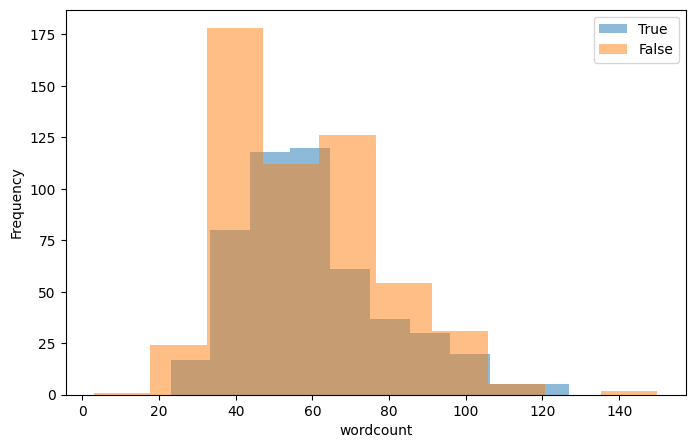

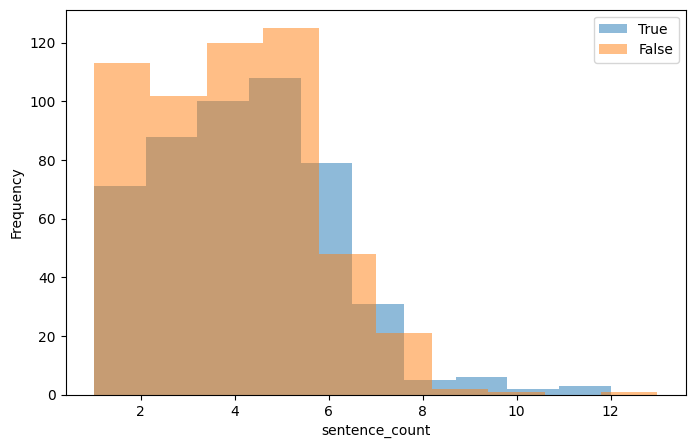

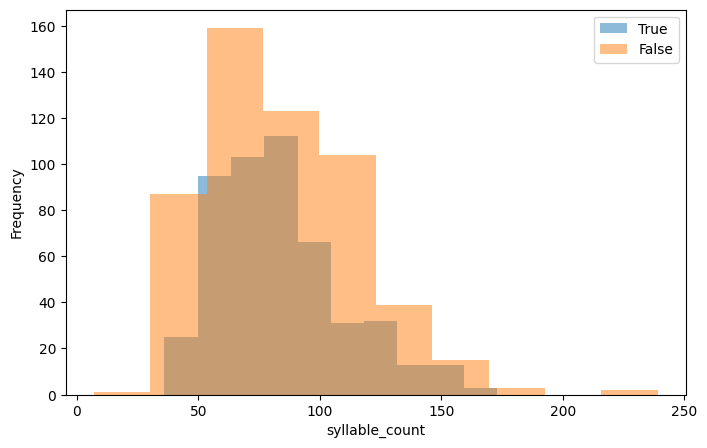

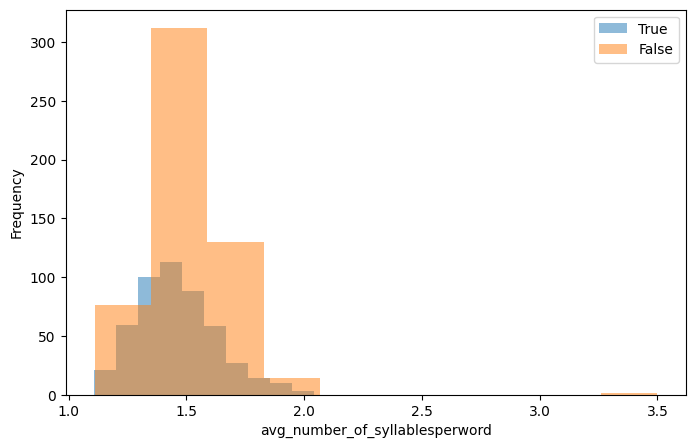

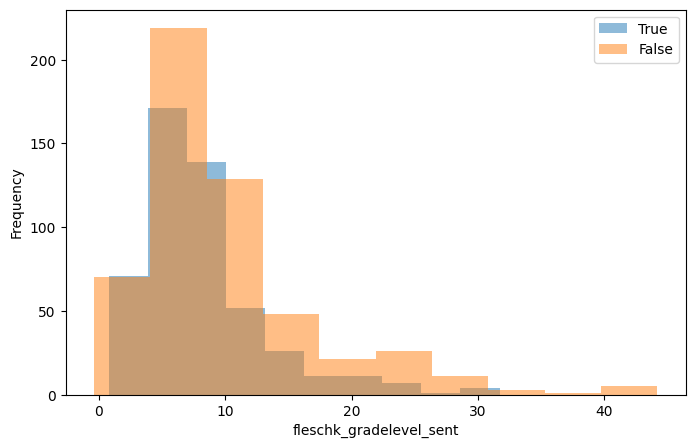

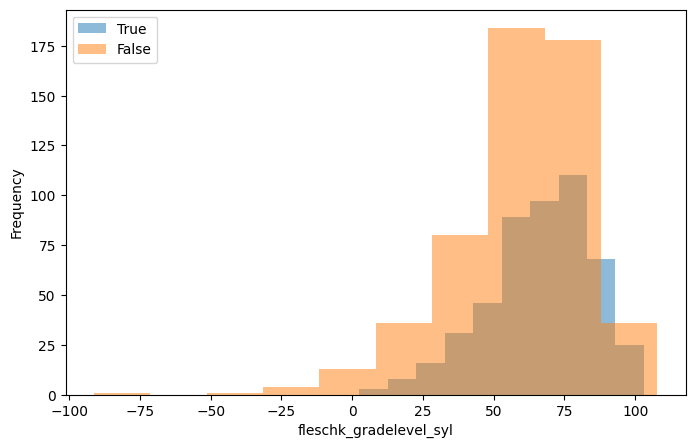

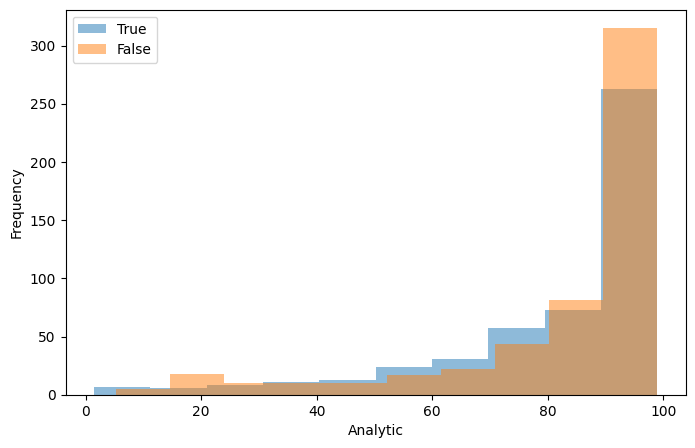

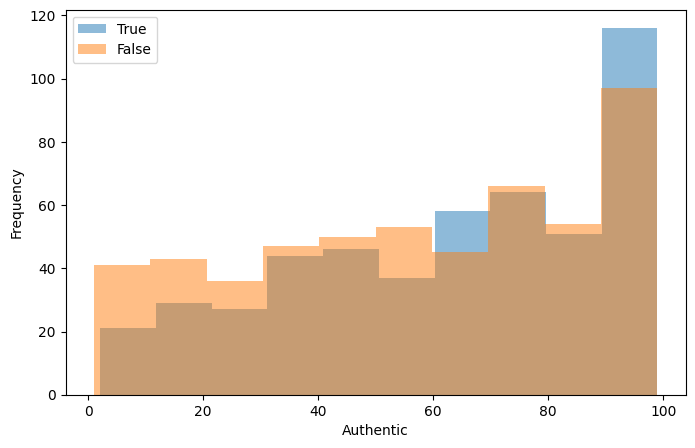

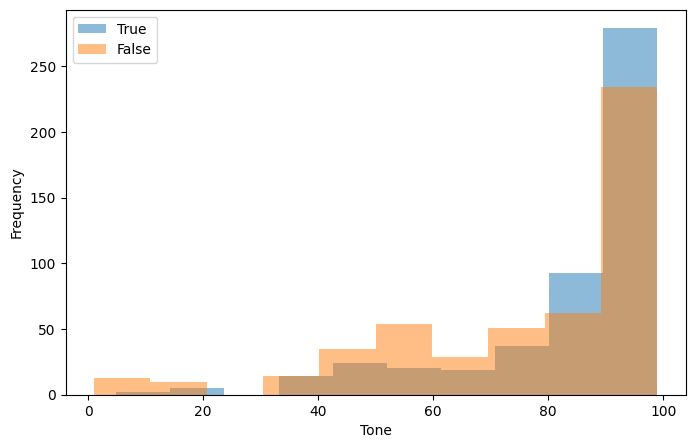

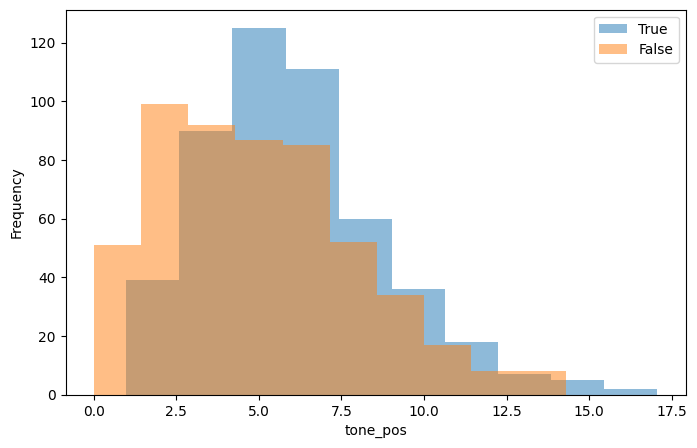

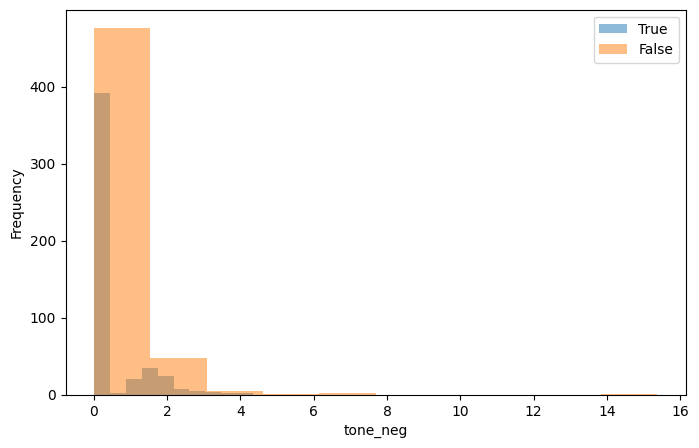

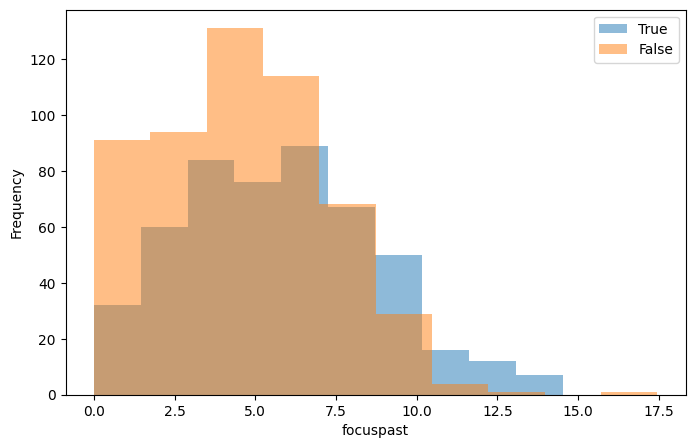

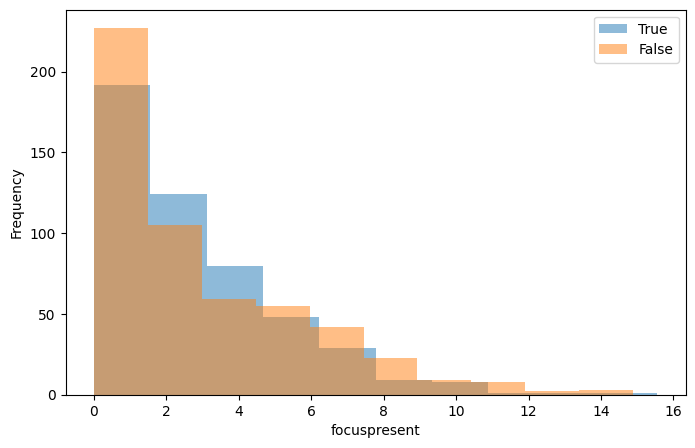

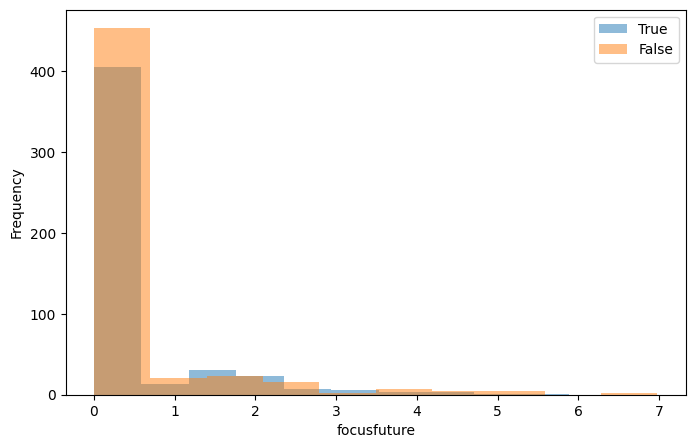

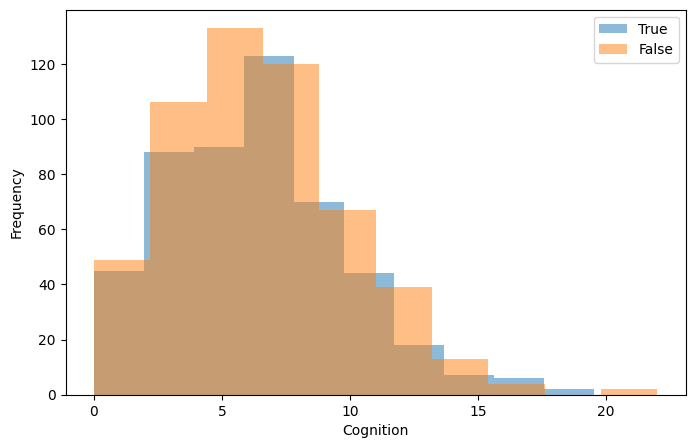

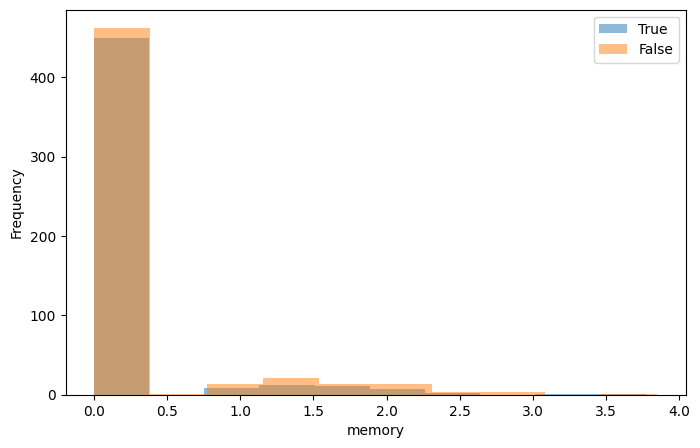

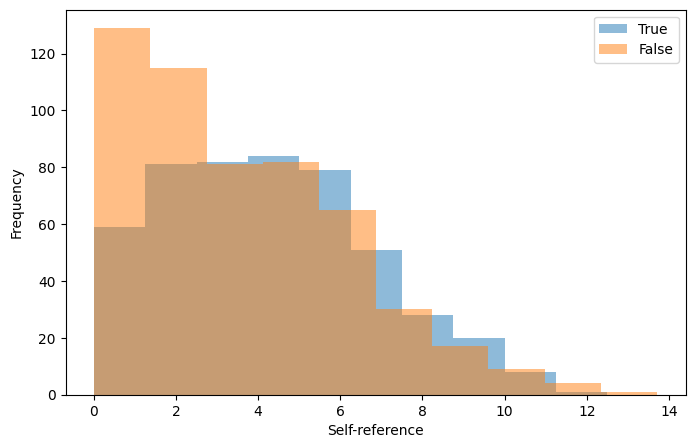

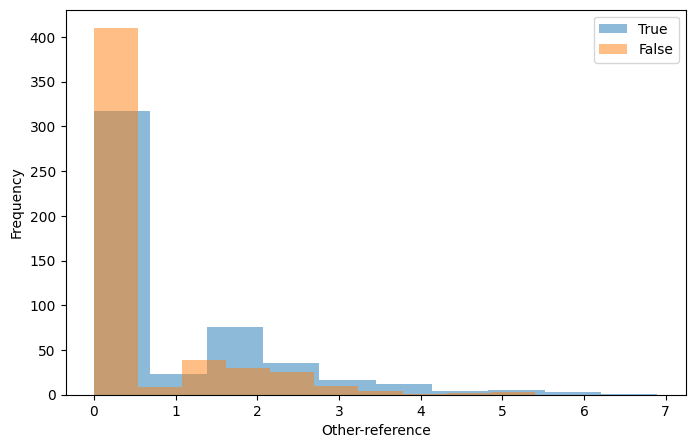

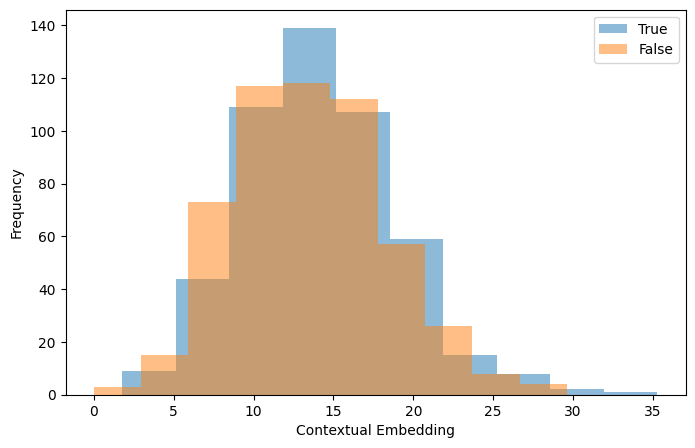

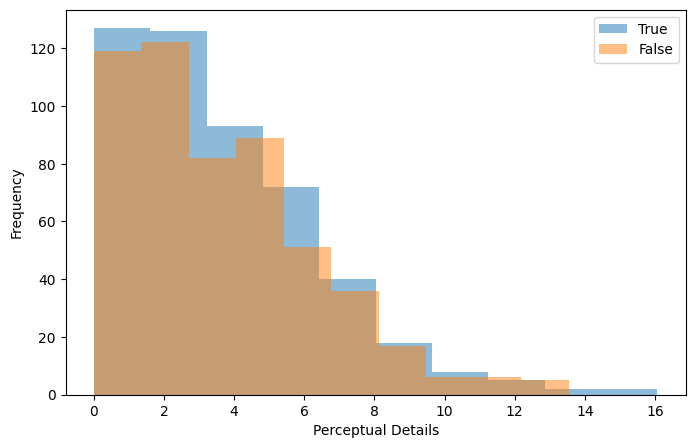

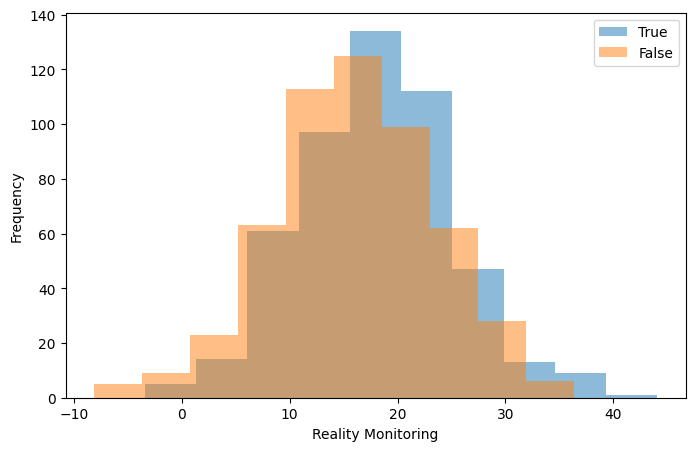

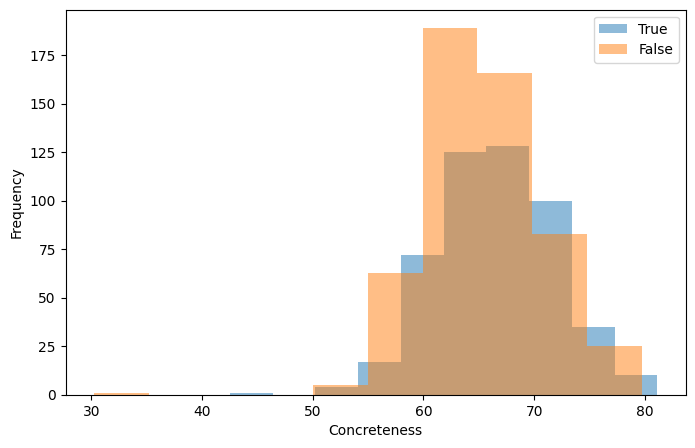

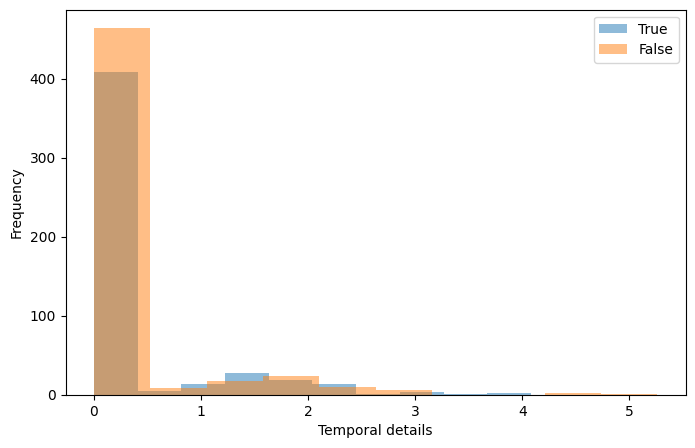

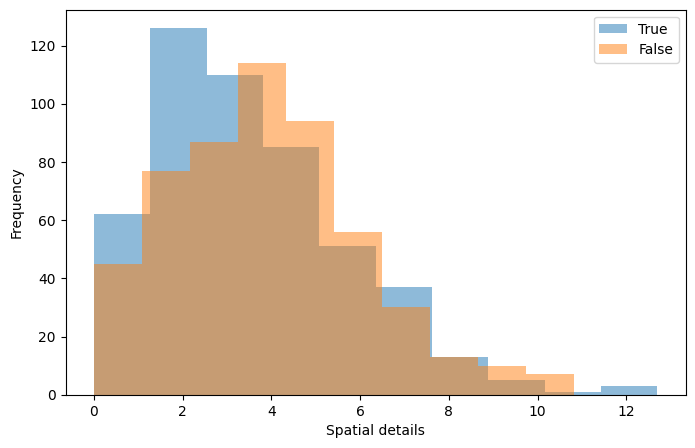

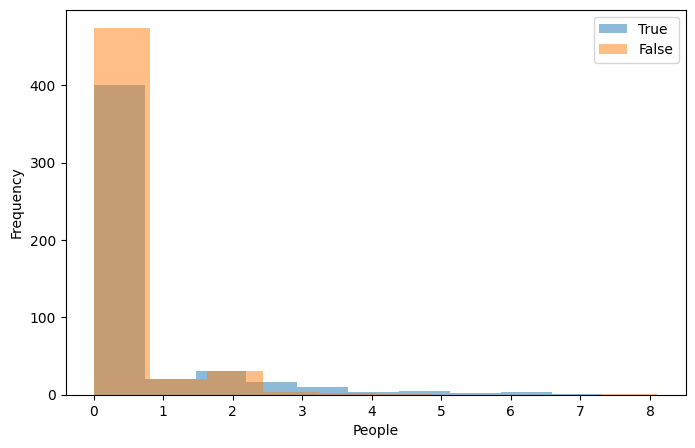

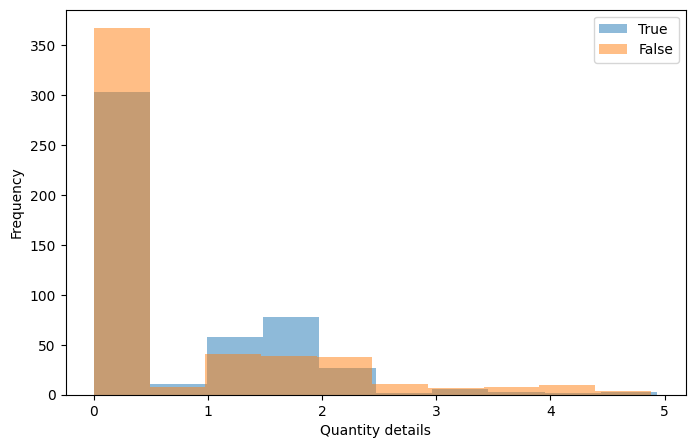

In [47]:
import matplotlib.pyplot as plt

# Convert columns to numeric data types
Final_Exp_df_true = Final_Exp_df_true.apply(pd.to_numeric, errors='coerce')
Final_Expd_false = Final_Expd_false.apply(pd.to_numeric, errors='coerce')
# Plot histograms
for score in Final_Exp_df_true:
    Final_Exp_df_true[score].plot.hist(alpha=0.5, figsize=(8, 5), bins=10, label = 'True')
    Final_Expd_false[score].plot.hist(alpha=0.5, figsize=(8, 5), bins=10, label = 'False')

    for df in [Final_Exp_df_true, Final_Expd_false]:
      for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    # Add labels to variables
    plt.xlabel(score)
    plt.ylabel('Frequency')
    plt.legend()

    # Show plot
    plt.show()

In [48]:
!pip install pingouin
import pingouin as pg
from scipy.stats import shapiro, levene, permutation_test
from statsmodels.stats.multitest import multipletests
## Define functions for analysis:

# Computing independent permutation tests:
def comparitive_stats(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

In [50]:
# Bootstrap CI for CLES
def CLES_ConfInv_bootstrap_method(x, y, alpha=0.05, n_boot=1000):
    CLES_bootstarp_res = []
    for _ in range(n_boot):
        subset_x = np.random.choice(x, size=len(x), replace=True)
        subset_y = np.random.choice(y, size=len(y), replace=True)
        cles = pg.compute_effsize(subset_x, subset_y, eftype='CLES')
        CLES_bootstarp_res.append(cles)
    lower_bound_ci = np.percentile(CLES_bootstarp_res, 100 * (alpha / 2))
    upper_bound_ci = np.percentile(CLES_bootstarp_res, 100 * (1 - alpha / 2))
    return (round((lower_bound_ci), 2), round((upper_bound_ci), 2))


In [51]:
# Compute Cohen's d and its CI
def Cohens_d_ConfInv(x, y, confidence=0.95):
    diff_bwn_means = pg.compute_effsize(x, y, paired=False, eftype='cohen')
    low_bound_ci, high_bound_ci = pg.compute_esci(stat=diff_bwn_means, nx=len(x), ny=len(y), paired=False, eftype='cohen', confidence=confidence)
    return diff_bwn_means, (low_bound_ci, high_bound_ci)

In [52]:
# Apply the analysis:

Cohensscore = []
Cohens_ConfInv= []
res_test_stats = []
p_values = []
CLESscore = []
ConfInv_CLES = []


In [53]:
# Iterate over each column in Final_Traildf_true
for col in Final_Exp_df_true.columns:
  # Convert column values to float (if they are not already numeric)
    Final_Exp_df_true[col] = pd.to_numeric(Final_Exp_df_true[col], errors='coerce')
    Final_Expd_false[col] = pd.to_numeric(Final_Expd_false[col], errors='coerce')

    # Drop NaN values
    Final_Exp_df_true.dropna(subset=[col], inplace=True)
    Final_Expd_false.dropna(subset=[col], inplace=True)

    # Check the number of unique values in each sample
    unique_true = Final_Exp_df_true[col].nunique()
    unique_false = Final_Expd_false[col].nunique()

    print(f"Column: {col}, Unique True: {unique_true}, Unique False: {unique_false}")

    # Perform statistical tests only if both samples have enough unique values
    if unique_true >= 2 and unique_false >= 2:
      # Perform statistical tests and effect size computations as before
      results = permutation_test((Final_Exp_df_true[col], Final_Expd_false[col]), comparitive_stats, vectorized=True, n_resamples=10000)
      res_test_stats.append(results.statistic)
      p_values.append(results.pvalue)

      # Compute CLES effect size and CI
      CLES = pg.compute_effsize(Final_Exp_df_true[col], Final_Expd_false[col], eftype='CLES')
      CLESscore.append(CLES)
      CLES_ConfInv = CLES_ConfInv_bootstrap_method(Final_Exp_df_true[col], Final_Expd_false[col])
      ConfInv_CLES.append(CLES_ConfInv)

      # Compute Cohen's d effect size and CI
      cohens_d, cohens_d_ci = Cohens_d_ConfInv(Final_Exp_df_true[col], Final_Expd_false[col])
      Cohensscore.append(cohens_d)
      Cohens_ConfInv.append(cohens_d_ci)

Column: wordcount, Unique True: 86, Unique False: 87
Column: sentence_count, Unique True: 12, Unique False: 11
Column: syllable_count, Unique True: 111, Unique False: 123
Column: avg_number_of_syllablesperword, Unique True: 383, Unique False: 372
Column: fleschk_gradelevel_sent, Unique True: 148, Unique False: 180
Column: fleschk_gradelevel_syl, Unique True: 380, Unique False: 395
Column: Analytic, Unique True: 311, Unique False: 316
Column: Authentic, Unique True: 273, Unique False: 270
Column: Tone, Unique True: 156, Unique False: 170
Column: tone_pos, Unique True: 214, Unique False: 216
Column: tone_neg, Unique True: 63, Unique False: 62
Column: focuspast, Unique True: 220, Unique False: 188
Column: focuspresent, Unique True: 154, Unique False: 160
Column: focusfuture, Unique True: 61, Unique False: 54
Column: Cognition, Unique True: 236, Unique False: 219
Column: memory, Unique True: 32, Unique False: 48
Column: Self-reference, Unique True: 214, Unique False: 188
Column: Other-refe

In [54]:
print("Length of Final_Exp_df_true.columns:", len(Final_Exp_df_true.columns))
print("Length of res_test_stats:", len(res_test_stats))
print("Length of p_values:", len(p_values))
print("Length of CLESscore:", len(CLESscore))
print("Length of ConfInv_CLES:", len(ConfInv_CLES))
print("Length of Cohensscore:", len(Cohensscore))
print("Length of Cohens_ConfInv:", len(Cohens_ConfInv))

Length of Final_Exp_df_true.columns: 26
Length of res_test_stats: 26
Length of p_values: 26
Length of CLESscore: 26
Length of ConfInv_CLES: 26
Length of Cohensscore: 26
Length of Cohens_ConfInv: 26


In [55]:
# Ensure all arrays have the same length
min_length = min(len(Final_Exp_df_true.columns), len(res_test_stats), len(p_values), len(CLESscore), len(ConfInv_CLES), len(Cohensscore), len(Cohens_ConfInv))
Final_Exp_df_true = Final_Exp_df_true.iloc[:, :min_length]
res_test_stats = res_test_stats[:min_length]
p_values = p_values[:min_length]
CLESscore = CLESscore[:min_length]
ConfInv_CLES = ConfInv_CLES[:min_length]
Cohensscore = Cohensscore[:min_length]
Cohens_ConfInv = Cohens_ConfInv[:min_length]

In [58]:
# Perform multiple comparisons correction using Bonferroni method
null_hyp_rej, corrected_p_values, _, _ = multipletests(p_values, alpha=0.02, method='holm')

# save results in a dataframe
stat_permresults_df = pd.DataFrame({
    "feature": Final_Exp_df_true.columns,
    "res_test_stats": res_test_stats,
    "p_value": p_values,
    "corrected_p_value": corrected_p_values,
    "effect_size_cles(res_test_stats)": CLESscore,
    "cles_95%_CI(ConfInv_CLES)": ConfInv_CLES,
    "effect_size_cohens_d(Cohensscore)": Cohensscore,
    "cohens_d_95%_CI(Cohens_ConfInv)": Cohens_ConfInv,
    "null_hyp_rejected": null_hyp_rej
})
stat_permresults_df["significance"] = ['*' if null_h else '-' for null_h in stat_permresults_df['null_hyp_rejected']]

# print all comparisons
stat_permresults_df.sort_values(["null_hyp_rejected", "effect_size_cles(res_test_stats)"], ascending=False, inplace=True)
stat_permresults_df

,feature,res_test_stats,p_value,corrected_p_value,effect_size_cles(res_test_stats),cles_95%_CI(ConfInv_CLES),effect_size_cohens_d(Cohensscore),cohens_d_95%_CI(Cohens_ConfInv),null_hyp_rejected,significance
11,focuspast,1.143369,0.000200,0.005199,0.603072,"(0.57, 0.64)",0.395209,"(0.27, 0.52)",True,*
16,Self-reference,0.749954,0.000200,0.005199,0.589162,"(0.56, 0.63)",0.281389,"(0.16, 0.41)",True,*
5,fleschk_gradelevel_syl,7.247421,0.000200,0.005199,0.586749,"(0.55, 0.62)",0.338455,"(0.21, 0.46)",True,*
9,tone_pos,0.794286,0.000200,0.005199,0.584367,"(0.55, 0.62)",0.283091,"(0.16, 0.41)",True,*
1,sentence_count,0.506281,0.000200,0.005199,0.578563,"(0.54, 0.61)",0.285357,"(0.16, 0.41)",True,*
8,Tone,7.235222,0.000200,0.005199,0.576304,"(0.54, 0.61)",0.338371,"(0.21, 0.46)",True,*
17,Other-reference,0.342006,0.000200,0.005199,0.569144,"(0.54, 0.6)",0.307204,"(0.18, 0.43)",True,*
21,Concreteness,1.161949,0.000600,0.009599,0.568990,"(0.53, 0.6)",0.219445,"(0.09, 0.34)",True,*
20,Reality Monitoring,1.422470,0.001200,0.017998,0.553457,"(0.52, 0.59)",0.199501,"(0.07, 0.32)",True,*
24,People,0.244863,0.000400,0.006799,0.539785,"(0.52, 0.56)",0.256208,"(0.13, 0.38)",True,*


In [68]:
stat_permresults_df.dtypes

feature                               object
res_test_stats                       float64
p_value                              float64
corrected_p_value                    float64
effect_size_cles(res_test_stats)     float64
cles_95%_CI(ConfInv_CLES)             object
effect_size_cohens_d(Cohensscore)    float64
cohens_d_95%_CI(Cohens_ConfInv)       object
null_hyp_rejected                       bool
significance                          object
dtype: object

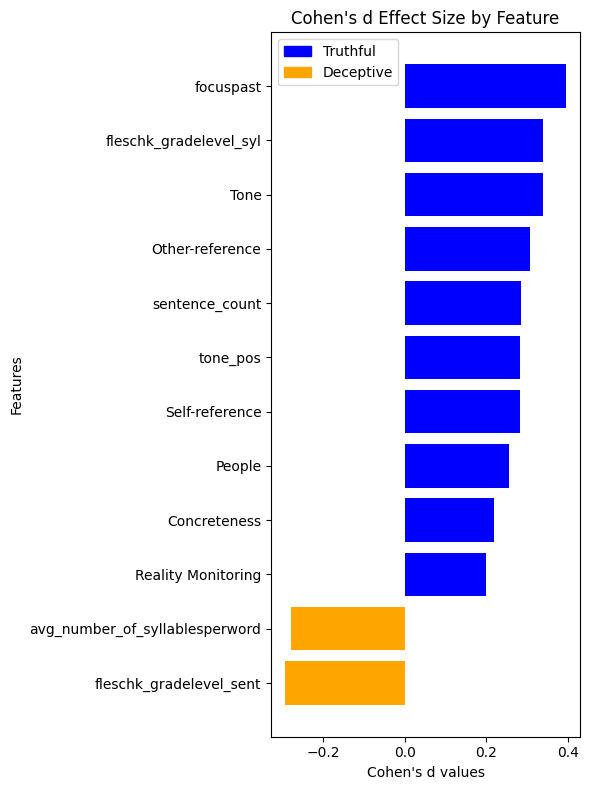

In [70]:
import matplotlib.pyplot as plt

# Select only significant features
stat_permresults_df_selected = stat_permresults_df.loc[stat_permresults_df['null_hyp_rejected'] == True, :]

# Sort the dataframe by effect size in descending order
stat_permresults_df_sorted = stat_permresults_df_selected.sort_values("effect_size_cohens_d(Cohensscore)", ascending=True)

# Create a horizontal bar chart of effect size with an increased figure size
fig, ax = plt.subplots(figsize=(6, 8))  # Adjust the size (width, height) as needed

# Define colors based on the stat value
colors = ['blue' if stat > 0 else 'orange' for stat in stat_permresults_df_sorted['res_test_stats']]

# Plot the bars
bars = ax.barh(stat_permresults_df_sorted['feature'], stat_permresults_df_sorted['effect_size_cohens_d(Cohensscore)'], color=colors)

# Add legend
t_patch = plt.Rectangle((0, 0), 0, 0, color='blue', label='Truthful')
f_patch = plt.Rectangle((0, 0), 0, 0, color='orange', label='Deceptive')
plt.legend(handles=[t_patch, f_patch])

# Set labels
ax.set_xlabel("Cohen's d values")
ax.set_ylabel('Features')
ax.set_title("Cohen's d Effect Size by Feature")

# Show the plot
plt.tight_layout()
plt.show()

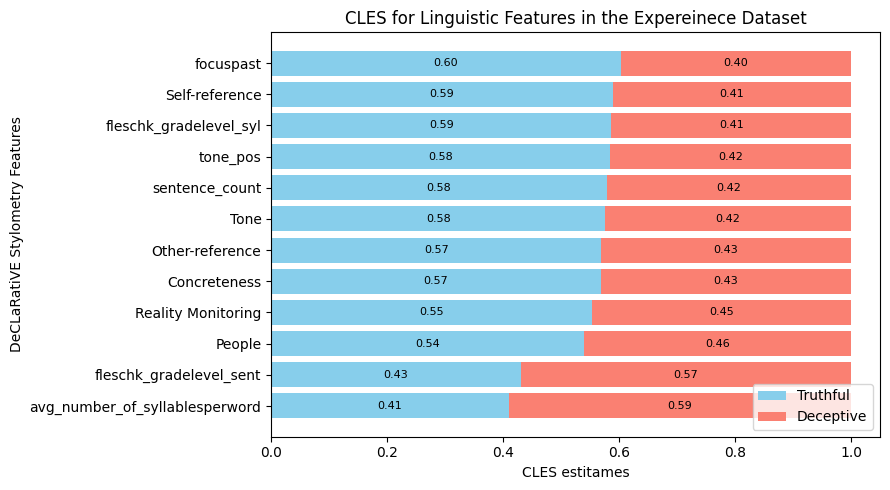

In [72]:
import matplotlib.pyplot as plt

# Select only significant features
stat_permresults_df_selected = stat_permresults_df.loc[stat_permresults_df['null_hyp_rejected'] == True, :]

# Sort the dataframe by effect size in ascending order
stat_permresults_df_sorted = stat_permresults_df_selected.sort_values("effect_size_cles(res_test_stats)", ascending=True)

# Set the figure size
fig, ax = plt.subplots(figsize=(9, 5))

# Calculate 1 - cles for the deceptive part
stat_permresults_df_sorted['one_minus_cles'] = 1 - stat_permresults_df_sorted['effect_size_cles(res_test_stats)']

# Plotting the 'cles' part (Truthful) in blue
ax.barh(stat_permresults_df_sorted['feature'], stat_permresults_df_sorted['effect_size_cles(res_test_stats)'], color='skyblue', label='Truthful')

# Plotting the '1 - cles' part (Deceptive) in orange
ax.barh(stat_permresults_df_sorted['feature'], stat_permresults_df_sorted['one_minus_cles'], left=stat_permresults_df_sorted['effect_size_cles(res_test_stats)'], color='salmon', label='Deceptive')

# Add legend
plt.legend(loc='lower right')

# Set labels and title
ax.set_xlabel('CLES estitames')
ax.set_ylabel('DeCLaRatiVE Stylometry Features')
ax.set_title('CLES for Linguistic Features in the Expereinece Dataset')

# Adding the text labels on bars
for index, (cles, one_minus_cles) in enumerate(zip(stat_permresults_df_sorted['effect_size_cles(res_test_stats)'], stat_permresults_df_sorted['one_minus_cles'])):
    # Annotate the blue part (cles)
    ax.text(cles/2, index, f"{cles:.2f}", va='center', ha='center', color='black', fontsize=8)
    # Annotate the orange part (1 - cles)
    ax.text(cles + one_minus_cles/2, index, f"{one_minus_cles:.2f}", va='center', ha='center', color='black', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-74-27117557e09a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat_permresults_df_selected['category'] = stat_permresults_df_selected['effect_size_cohens_d(Cohensscore)'].apply(lambda x: categorize_effect_size(x, quartiles))


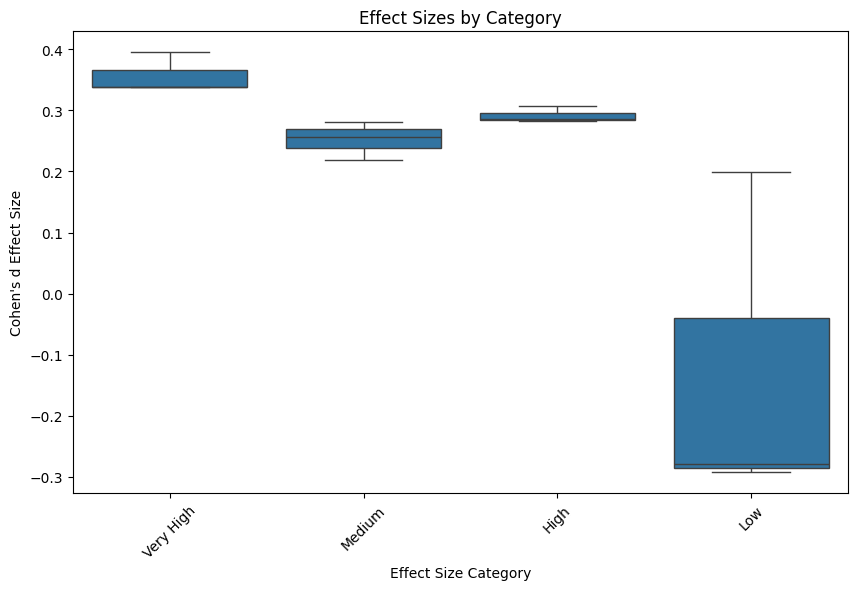

In [74]:
import numpy as np

# Determine quartiles of effect sizes to create categories
quartiles = np.percentile(stat_permresults_df_selected['effect_size_cohens_d(Cohensscore)'], [25, 50, 75])

# Create categories based on quartiles
def categorize_effect_size(effect_size, quartiles):
    if effect_size <= quartiles[0]:
        return 'Low'
    elif quartiles[0] < effect_size <= quartiles[1]:
        return 'Medium'
    elif quartiles[1] < effect_size <= quartiles[2]:
        return 'High'
    else:
        return 'Very High'

# Apply categorization function to create a new column 'category'
stat_permresults_df_selected['category'] = stat_permresults_df_selected['effect_size_cohens_d(Cohensscore)'].apply(lambda x: categorize_effect_size(x, quartiles))

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='effect_size_cohens_d(Cohensscore)', data=stat_permresults_df_selected)
plt.xlabel('Effect Size Category')
plt.ylabel("Cohen's d Effect Size")
plt.title('Effect Sizes by Category')
plt.xticks(rotation=45)
plt.show()


<ipython-input-77-5309152361b7>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = stat_permresults_df_selected.corr()


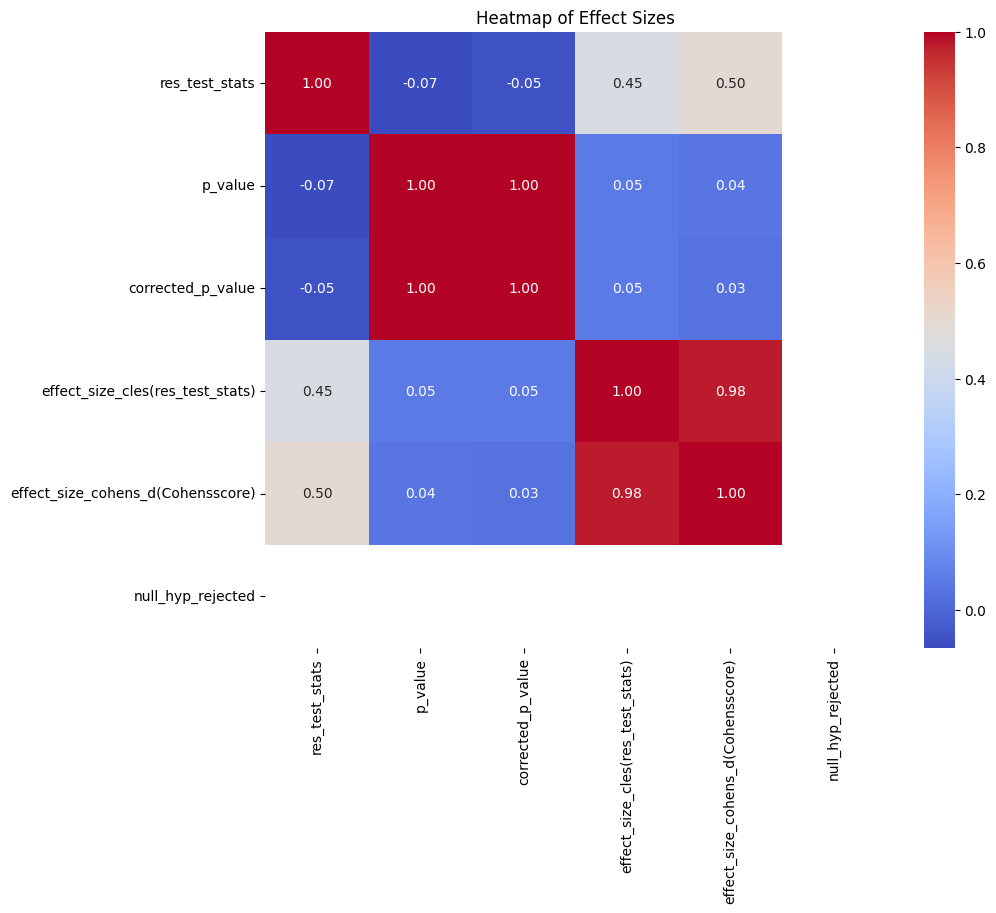

In [77]:
import seaborn as sns

# correlation heatmap of effect sizes between features
# Calculate the correlation matrix
correlation_matrix = stat_permresults_df_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Effect Sizes')
plt.show()

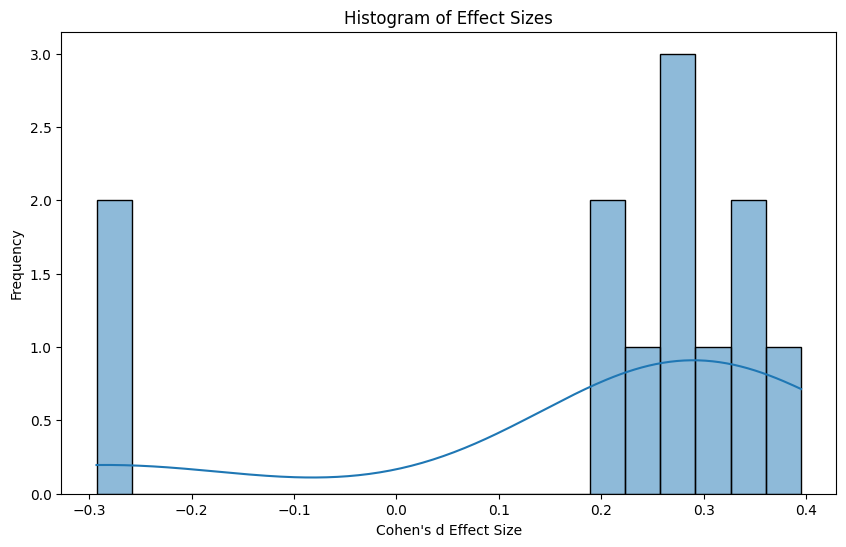

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of effect sizes
plt.figure(figsize=(10, 6))
sns.histplot(data=stat_permresults_df_selected, x='effect_size_cohens_d(Cohensscore)', bins=20, kde=True)
plt.xlabel("Cohen's d Effect Size")
plt.ylabel('Frequency')
plt.title('Histogram of Effect Sizes')
plt.show()